# Clustering - Customer Segmentaiton
## Part 4. Project Delivery

<br id = 'toc'>

**Table of Contents**

1. [Create Different Feature Sets](#feature)
    1. base_df (with only customer level data)
    2. threshold_df (base_df with added top 20 most purchased item data)
    3. pca_df (base_df with added top 127 principal components that captures 80% of total vairance)
2. [Create Clusters](#clustering)
3. [Clustering Comparison](#compare)
4. [Clustering Measure](#measure)
5. [Segments exploration](#seg)
    1. [Peak into the segments](#seg)
    2. [Segments analysis](#analyze)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import adjusted_rand_score, silhouette_score

import os

In [2]:
os.listdir('../data/')

['threshold_item_data.csv',
 'int_online_tx.csv',
 'cleaned_tx_df.csv',
 'pca_item_data.csv',
 'analytical_base_table.csv',
 'item_data.csv']

In [3]:
# load data
base_df = pd.read_csv('../data/analytical_base_table.csv', index_col = 0)
threshold_item_data = pd.read_csv('../data/threshold_item_data.csv', index_col = 0)
pca_item_data = pd.read_csv('../data/pca_item_data.csv', index_col = 0)

In [4]:
print (base_df.shape)
base_df.head()

(414, 9)


,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales
CustomerID,,,,,,,,,
12347,7,182,103,12.75,0.25,4310.00,224.82,1294.32,615.714286
12348,4,31,22,40.00,0.29,1797.24,227.44,892.80,449.310000
12349,1,73,73,300.00,0.42,1757.55,1757.55,1757.55,1757.550000
12350,1,17,17,40.00,0.85,334.40,334.40,334.40,334.400000
12352,8,85,59,376.50,0.65,2506.04,120.33,840.30,313.255000


In [5]:
print (threshold_item_data.shape)
threshold_item_data.head()

(414, 20)


,POST,22326,22423,22554,22556,21731,22328,22629,22551,21212,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,4,0,0,5,0,0,0,0,0,3,0,4,0,0,0,0,0,0
12348,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12349,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12350,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12352,5,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
print(pca_item_data.shape)
pca_item_data.head()

(414, 127)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876139,4.828923,-0.495522,3.093840,-0.633760,-11.534044,2.161981,7.116815,5.335970,4.424404,...,-0.233783,-0.584289,-0.332693,-0.018121,-0.012031,0.319372,-0.228497,-0.181900,0.125802,0.007654
12348,-4.219834,1.226168,-1.881946,-0.174253,0.817855,1.160770,-0.871799,-0.846682,0.460038,0.854503,...,-0.901531,-2.007518,-1.132574,-1.137798,1.077750,0.936439,0.139439,0.026970,0.780076,0.464609
12349,-1.260855,2.387688,-0.073017,-1.119318,-0.033802,-3.714777,-0.343909,-0.149342,-0.789245,-0.379961,...,4.032227,-0.550180,-0.695411,-0.662426,5.959808,4.821094,-1.721362,2.923693,-4.922430,-1.929463
12350,-4.929319,-0.714820,-1.580964,-0.469820,-0.116420,0.648000,0.112912,-1.336333,1.546848,-1.190465,...,-0.007665,0.448086,0.204818,-0.749806,-2.130448,0.870626,-0.470492,-1.031777,1.202488,1.705489
12352,-2.053144,2.110828,0.184974,0.128380,0.087610,-1.943865,2.384714,0.898953,-0.672995,0.080393,...,-6.478849,-4.722140,-1.034470,6.360525,-6.582006,-2.422250,0.082824,-1.453668,-1.329513,-8.895094


[back to top](#toc)
<a id = 'feature'></a>
    
### 1. Create Different Feature Sets

In [7]:
# customer level data with purchase behavior in top 20 most purchased items
threshold_df = base_df.join(threshold_item_data )
print (threshold_df.shape)
threshold_df.head()

(414, 29)


,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,POST,...,20725,23084,20750,20719,20726,85099B,21080,22139,22630,22961
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,12.75,0.25,4310.00,224.82,1294.32,615.714286,0,...,0,3,0,4,0,0,0,0,0,0
12348,4,31,22,40.00,0.29,1797.24,227.44,892.80,449.310000,4,...,0,0,0,0,0,0,0,0,0,0
12349,1,73,73,300.00,0.42,1757.55,1757.55,1757.55,1757.550000,1,...,0,0,0,0,0,0,0,0,0,0
12350,1,17,17,40.00,0.85,334.40,334.40,334.40,334.400000,1,...,0,0,0,0,0,0,0,0,0,0
12352,8,85,59,376.50,0.65,2506.04,120.33,840.30,313.255000,5,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# customer level data with purchase behavior transformed in PCA
pca_df = base_df.join(pca_item_data)
print(pca_df.shape)
pca_df.head()

(414, 136)


,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,PC1,...,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,12.75,0.25,4310.00,224.82,1294.32,615.714286,5.876139,...,-0.233783,-0.584289,-0.332693,-0.018121,-0.012031,0.319372,-0.228497,-0.181900,0.125802,0.007654
12348,4,31,22,40.00,0.29,1797.24,227.44,892.80,449.310000,-4.219834,...,-0.901531,-2.007518,-1.132574,-1.137798,1.077750,0.936439,0.139439,0.026970,0.780076,0.464609
12349,1,73,73,300.00,0.42,1757.55,1757.55,1757.55,1757.550000,-1.260855,...,4.032227,-0.550180,-0.695411,-0.662426,5.959808,4.821094,-1.721362,2.923693,-4.922430,-1.929463
12350,1,17,17,40.00,0.85,334.40,334.40,334.40,334.400000,-4.929319,...,-0.007665,0.448086,0.204818,-0.749806,-2.130448,0.870626,-0.470492,-1.031777,1.202488,1.705489
12352,8,85,59,376.50,0.65,2506.04,120.33,840.30,313.255000,-2.053144,...,-6.478849,-4.722140,-1.034470,6.360525,-6.582006,-2.422250,0.082824,-1.453668,-1.329513,-8.895094


[back to top](#toc)
<a id = 'clustering'></a>

### 2. Create Clusters
**n_clusters = 3 per client request**

In [9]:
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state = 26))

In [10]:
base_df.loc[:, 'cluster'] = kmeans.fit_predict(base_df)
print (base_df.shape)
base_df.head()

(414, 10)


,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,cluster
CustomerID,,,,,,,,,,
12347,7,182,103,12.75,0.25,4310.00,224.82,1294.32,615.714286,2
12348,4,31,22,40.00,0.29,1797.24,227.44,892.80,449.310000,0
12349,1,73,73,300.00,0.42,1757.55,1757.55,1757.55,1757.550000,0
12350,1,17,17,40.00,0.85,334.40,334.40,334.40,334.400000,0
12352,8,85,59,376.50,0.65,2506.04,120.33,840.30,313.255000,0


In [11]:
base_df.cluster.value_counts()

0    332
2     65
1     17
Name: cluster, dtype: int64

In [12]:
threshold_df.loc[:, 'cluster'] = kmeans.fit_predict(threshold_df)
print (threshold_df.shape)
threshold_df.head()

(414, 30)


,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,POST,...,23084,20750,20719,20726,85099B,21080,22139,22630,22961,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,12.75,0.25,4310.00,224.82,1294.32,615.714286,0,...,3,0,4,0,0,0,0,0,0,0
12348,4,31,22,40.00,0.29,1797.24,227.44,892.80,449.310000,4,...,0,0,0,0,0,0,0,0,0,0
12349,1,73,73,300.00,0.42,1757.55,1757.55,1757.55,1757.550000,1,...,0,0,0,0,0,0,0,0,0,0
12350,1,17,17,40.00,0.85,334.40,334.40,334.40,334.400000,1,...,0,0,0,0,0,0,0,0,0,0
12352,8,85,59,376.50,0.65,2506.04,120.33,840.30,313.255000,5,...,0,0,0,0,0,0,0,1,0,0


In [13]:
threshold_df.cluster.value_counts()

0    351
1     60
2      3
Name: cluster, dtype: int64

In [14]:
pca_df.loc[:,'cluster'] = kmeans.fit_predict(pca_df)
print(pca_df.shape)
pca_df.head()

(414, 137)


,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,PC1,...,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,12.75,0.25,4310.00,224.82,1294.32,615.714286,5.876139,...,-0.584289,-0.332693,-0.018121,-0.012031,0.319372,-0.228497,-0.181900,0.125802,0.007654,1
12348,4,31,22,40.00,0.29,1797.24,227.44,892.80,449.310000,-4.219834,...,-2.007518,-1.132574,-1.137798,1.077750,0.936439,0.139439,0.026970,0.780076,0.464609,0
12349,1,73,73,300.00,0.42,1757.55,1757.55,1757.55,1757.550000,-1.260855,...,-0.550180,-0.695411,-0.662426,5.959808,4.821094,-1.721362,2.923693,-4.922430,-1.929463,0
12350,1,17,17,40.00,0.85,334.40,334.40,334.40,334.400000,-4.929319,...,0.448086,0.204818,-0.749806,-2.130448,0.870626,-0.470492,-1.031777,1.202488,1.705489,0
12352,8,85,59,376.50,0.65,2506.04,120.33,840.30,313.255000,-2.053144,...,-4.722140,-1.034470,6.360525,-6.582006,-2.422250,0.082824,-1.453668,-1.329513,-8.895094,0


In [15]:
pca_df.cluster.value_counts()

0    322
1     91
2      1
Name: cluster, dtype: int64

[back to top](#toc)
<a id = 'compare'></a>

### 3. Cluster Comparison

In [16]:
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.6258607629576566

In [17]:
adjusted_rand_score(base_df.cluster, pca_df.cluster)

0.759900624914276

In [18]:
adjusted_rand_score(threshold_df.cluster, pca_df.cluster)

0.5589247668882706

[back to top](#toc)
<a id = 'measure'></a>

### 4. Cluster Measure

In [19]:
silhouette_score(base_df.drop('cluster', axis = 1), base_df.cluster)

0.6114317916605772

In [20]:
silhouette_score(threshold_df.drop('cluster', axis = 1), threshold_df.cluster)

0.5965836578964672

In [21]:
silhouette_score(pca_df.drop('cluster', axis = 1), pca_df.cluster)

0.5749868356265703

In [23]:
base_df.to_csv('../deliverables/customer_segments.csv')

**Notes:**
base_df has the best silhouette measure, thus we will use the clusters formed using this dataset.

[back to top](#toc)
<a id = 'seg'></a>
## 5. Segments Exploration
### 5.1 Peak Into the Segments

In [23]:
base_df.describe()

,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,cluster
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,3.710145,81.396135,60.625604,60.499855,0.580483,2262.538913,423.700459,898.712874,637.347366,0.355072
std,4.255524,96.304061,60.383299,299.793532,1.060587,3479.689136,648.729257,1106.085217,740.293974,0.737781
min,1.000000,1.000000,1.000000,0.850000,0.040000,51.560000,3.000000,51.560000,51.560000,0.000000
25%,1.000000,21.250000,20.000000,16.950000,0.210000,459.650000,120.510000,325.662500,259.829750,0.000000
50%,2.000000,45.000000,38.000000,18.000000,0.420000,1025.700000,252.150000,551.615000,417.804000,0.000000
75%,4.000000,101.000000,82.000000,28.000000,0.550000,2659.962500,460.767500,1053.660000,710.275000,0.000000
max,32.000000,638.000000,323.000000,4161.060000,15.000000,31906.820000,6207.670000,9341.260000,6207.670000,2.000000


In [32]:
print(base_df.cluster.value_counts()/base_df.shape[0])
print(base_df.cluster.value_counts())

0    0.801932
2    0.157005
1    0.041063
Name: cluster, dtype: float64
0    332
2     65
1     17
Name: cluster, dtype: int64


In [25]:
corr = base_df.corr()
corr.shape

(10, 10)

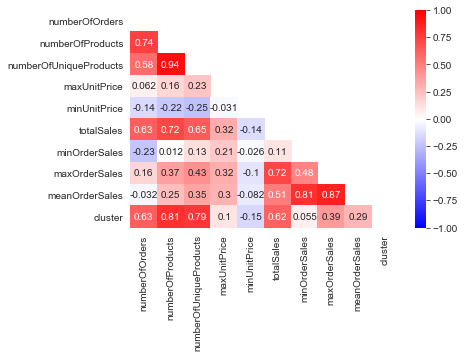

In [26]:
sns.set_style('whitegrid')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True, cmap = 'bwr', vmin = -1)
plt.show()

In [27]:
base_df.describe()

,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,cluster
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,3.710145,81.396135,60.625604,60.499855,0.580483,2262.538913,423.700459,898.712874,637.347366,0.355072
std,4.255524,96.304061,60.383299,299.793532,1.060587,3479.689136,648.729257,1106.085217,740.293974,0.737781
min,1.000000,1.000000,1.000000,0.850000,0.040000,51.560000,3.000000,51.560000,51.560000,0.000000
25%,1.000000,21.250000,20.000000,16.950000,0.210000,459.650000,120.510000,325.662500,259.829750,0.000000
50%,2.000000,45.000000,38.000000,18.000000,0.420000,1025.700000,252.150000,551.615000,417.804000,0.000000
75%,4.000000,101.000000,82.000000,28.000000,0.550000,2659.962500,460.767500,1053.660000,710.275000,0.000000
max,32.000000,638.000000,323.000000,4161.060000,15.000000,31906.820000,6207.670000,9341.260000,6207.670000,2.000000


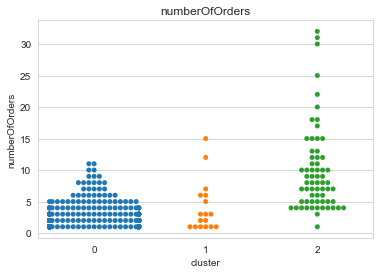

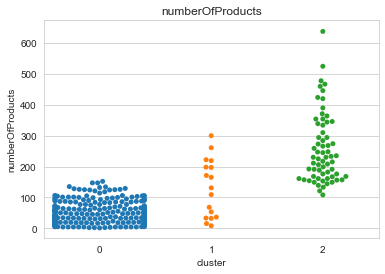

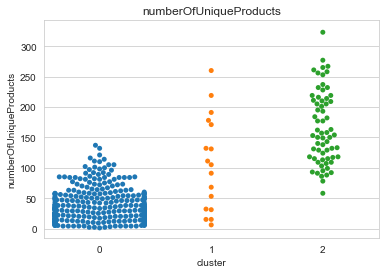

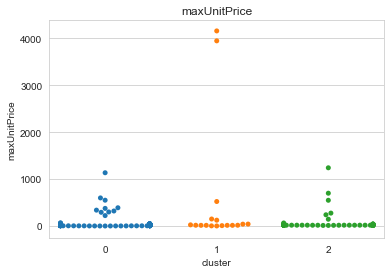

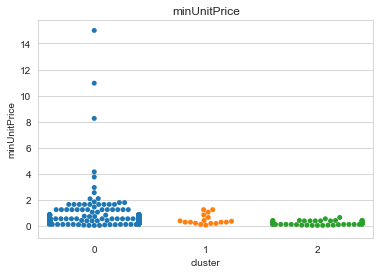

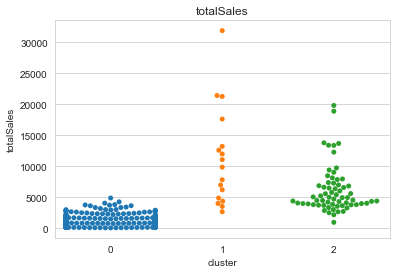

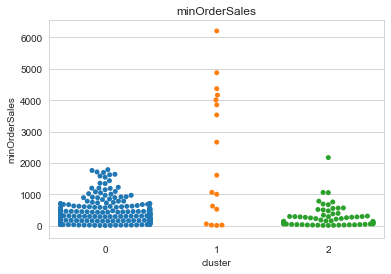

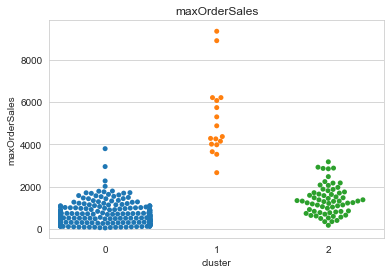

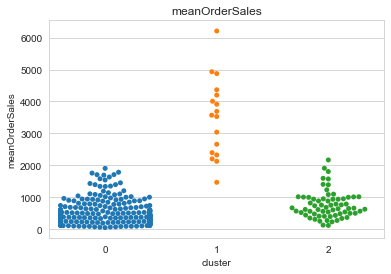

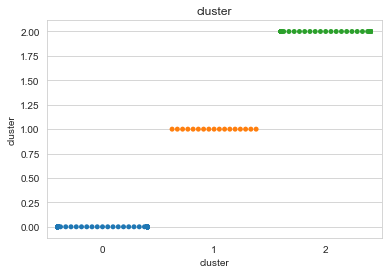

In [30]:
for c in base_df.columns.tolist():
    sns.swarmplot(x = 'cluster', y = c, data = base_df)
    plt.title(c)
    plt.show()

In [40]:
base_df[base_df.cluster == 0].describe()

,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,cluster
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.0
mean,2.478916,44.436747,37.605422,34.317771,0.655331,1045.404880,359.999759,589.859006,466.255347,0.0
std,1.968676,33.983009,27.156774,86.698811,1.167036,900.499615,340.408360,459.484405,350.003991,0.0
min,1.000000,1.000000,1.000000,0.850000,0.040000,51.560000,3.000000,51.560000,51.560000,0.0
25%,1.000000,18.750000,17.000000,15.000000,0.290000,399.972500,131.725000,281.110000,233.603438,0.0
50%,2.000000,34.000000,31.000000,18.000000,0.420000,734.370000,253.790000,460.515000,370.548500,0.0
75%,3.000000,63.000000,53.000000,28.000000,0.650000,1371.655000,451.357500,737.235000,562.539375,0.0
max,11.000000,152.000000,137.000000,1136.300000,15.000000,4881.880000,1784.710000,3794.400000,1905.975000,0.0


In [38]:
base_df[base_df.cluster == 1].describe()

,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,cluster
count,17.000000,17.000000,17.000000,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.0
mean,4.117647,130.470588,106.411765,536.639412,0.48000,11261.577059,2267.906471,5147.324706,3501.165896,1.0
std,4.090879,93.753078,77.694963,1330.719669,0.38775,7941.366190,2046.775730,1803.382154,1229.442994,0.0
min,1.000000,8.000000,6.000000,1.790000,0.06000,2661.240000,4.950000,2661.240000,1469.038333,1.0
25%,1.000000,36.000000,32.000000,14.950000,0.21000,4873.810000,523.000000,4008.620000,2398.192000,1.0
50%,3.000000,131.000000,105.000000,16.950000,0.29000,9864.260000,1607.040000,4366.780000,3571.565000,1.0
75%,6.000000,198.000000,171.000000,125.000000,0.65000,13219.740000,4008.620000,6068.060000,4200.610000,1.0
max,15.000000,300.000000,260.000000,4161.060000,1.25000,31906.820000,6207.670000,9341.260000,6207.670000,1.0


In [39]:
base_df[base_df.cluster == 2].describe()

,numberOfOrders,numberOfProducts,numberOfUniqueProducts,maxUnitPrice,minUnitPrice,totalSales,minOrderSales,maxOrderSales,meanOrderSales,cluster
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,9.892308,257.338462,166.230769,69.701077,0.224462,6125.690462,266.733231,1365.068000,762.234062,2.0
std,6.775699,111.866030,59.775562,185.853373,0.129434,3717.899101,345.944223,692.463072,422.947412,0.0
min,1.000000,108.000000,58.000000,12.750000,0.040000,954.420000,4.630000,174.720000,119.302500,2.0
25%,5.000000,168.000000,117.000000,18.000000,0.120000,3849.780000,49.800000,829.990000,485.425333,2.0
50%,8.000000,230.000000,154.000000,18.000000,0.190000,4939.990000,146.800000,1307.760000,660.801667,2.0
75%,12.000000,334.000000,211.000000,29.950000,0.290000,6989.630000,303.760000,1715.850000,952.805000,2.0
max,32.000000,638.000000,323.000000,1241.980000,0.650000,19824.050000,2169.390000,3174.430000,2169.390000,2.0


In [47]:
print(base_df.groupby('cluster').totalSales.sum())
print(base_df.groupby('cluster').totalSales.sum()/base_df.totalSales.sum())

cluster
0    347074.42
1    191446.81
2    398169.88
Name: totalSales, dtype: float64
cluster
0    0.370532
1    0.204386
2    0.425081
Name: totalSales, dtype: float64


[back to top](#toc)

<a id = 'analyze'></a>

### 5.2 Making use of the segments

#### Segment 0: "Occasional small shoppers"
1. 80% of the customers belong to this segment, they are responsible for 37% of total sales.
2. Customers in this segment shop occasionally, averageing 2.5 orders a year, 15 products per order, generate 466 in sales, and has an average annual spending of just over 1,000 dollars. 
3. They shop the least frequently, buys the least amount of products each time, and as a result, generate the least sales per order as well as total sales.


#### Segment 1: "Big spender or boutiques"
1. Only 17 or 4% of customers fall in this segment, they are responsible for 20% of total sales.
2. Customers in this segment have the highest mean order sales. 16 out of the 17 customers with mean order sales over 2000 dollars are in this segment. Also, 16 out of the TOP 17 most expensive orders also comes from this segment. 
3. They shop around 4 times a year, purchase 30 products per order. But their appetite for higher ticketed items push up their average sales per order to over 2,000 dollars. As a result, their annual spending is the highest among all segments at over 11,000 dollars. Almost double that of segment 2, and 10 times that of segment 0.
4. We can describte this segment as big boutique shoppers due to their high sales per order that is a combination of more prouducts per order that also include expensive items.


#### Segment 2: "loyal shoppers"
1. 62 or 15.7% of customers belong to this segment, they are responsible for 42% of total sales.
2. The most distinctive feature for customers in this segment is that they all purchasd at least 100 products through out the year. This is largly due to their high shopping frequency.
3. They shop on average 10 times a year, the highest of all segments. As a result, they purchase, on average, 260 products annually compared to 130 for segment 1 and 44 for segment 0.
4. Their annual spending is over 6,000 dollars due to the high purchase frquency. 
5. We can view this segment as customers who are loyal to our client, as they frequently comes back to order more products.

---
### How to use this infromation?
With the above insights, our client may choose to tailor their product offering and service to each segment. Some ideas:
1. Most efforts should be allocated to loayl shoppers. Volume and frequency promitions, frequent marketing contacts, most importantly, provide VIP customer support to make sure customers understand their loyalty is appreciated. In terms of marketing, products they frequently purchase, or related products should be the most relevant.

2. For the boutique shoppers, individual attention should be paid. Understand their need for the higher ticketed items. Provide highly customized customer service. It is important to follow up after a purchase on an expensive item to ensure the cutomer's ultimae satisfaction. Proactivaly find lead and source for the more expensive products, individually reach out with the offerings.  

3. For the occasional small shoppers, they can be viewed as potential other two types. Besides providing incentives of referrals, and discounts for volume/frequency, customer service should focus on their overall shopping experience, rather than on a specific product. Further product recommendations can be more diverse, less targeted. 

Of course, this is just an overlook based on our analysis above. Our client will have more in house data on each customer if they dwell deeper, which will provide further insights as to how they can serve their customers better. So, this is where I wrap up this project.

**This is the end of this project, please feel free to reach out!**